In [39]:
!pip install tensorflow_text

In [40]:
!pip install neattext

In [41]:
import neattext.functions as nfx

In [42]:
import tensorflow_hub as hub
import pandas as pd
import tensorflow_text as text
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from wordcloud import WordCloud

In [43]:
# load data
df = pd.read_csv('spamham.csv')

In [44]:
df.sample(5)

,Text,Class,Label
2479,I called house and got vmI came to ny last nig...,0,ham
1800,From=3AMrs Fatima Ali=2EAttn=3AThe Managing Di...,1,spam
2916,am todayNo u r not. That's old and wrong.,0,ham
2501,8.25 am DEPART Private Residence En route Stat...,0,ham
4289,Also you'll get Bibi points tonight fresh from...,0,ham


In [45]:
#user handles
df['Clean_Text'] = df["Text"].apply(nfx.remove_userhandles)

In [46]:
#stop words
df['Clean_Text'] = df["Clean_Text"].apply(nfx.remove_stopwords)

In [47]:
df

,Text,Class,Label,Clean_Text
0,Supply Quality China's EXCLUSIVE dimensions at...,1,spam,Supply Quality China's EXCLUSIVE dimensions Un...
1,over. SidLet me know. Thx.,0,ham,over. SidLet know. Thx.
2,"Dear Friend,Greetings to you.I wish to accost ...",1,spam,"Dear Friend,Greetings you.I wish accost reques..."
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1,spam,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....
4,Not a surprising assessment from Embassy.,0,ham,surprising assessment Embassy.
...,...,...,...,...
4840,It has been prepared- ready for your signature...,0,ham,prepared- ready signature tomorrow.
4841,And to you too,0,ham,
4842,<html><head><style>P{margin:0px;padding:0px}body,1,spam,<html><head><style>P{margin:0px;padding:0px}body
4843,Robinson talking now voice cracking but resolu...,0,ham,Robinson talking voice cracking resolute carvi...


In [48]:
df.drop(['Text'], axis = 1)

,Class,Label,Clean_Text
0,1,spam,Supply Quality China's EXCLUSIVE dimensions Un...
1,0,ham,over. SidLet know. Thx.
2,1,spam,"Dear Friend,Greetings you.I wish accost reques..."
3,1,spam,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....
4,0,ham,surprising assessment Embassy.
...,...,...,...
4840,0,ham,prepared- ready signature tomorrow.
4841,0,ham,
4842,1,spam,<html><head><style>P{margin:0px;padding:0px}body
4843,0,ham,Robinson talking voice cracking resolute carvi...


The nltp library simplfies the text cleaning process, as it cleans the emails passed to it by default(removes bad pattern and stop words, tokenization and lemmatization). We can also get the token form of the text passed to it by using .token().

In [49]:

!pip install nltp

In [50]:
import nltk

In [51]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
from nltp import Preprocessor
pre = Preprocessor(df['Clean_Text']).text_cleaner()

Cleaning Complete
Time Taken: 2.512 seconds


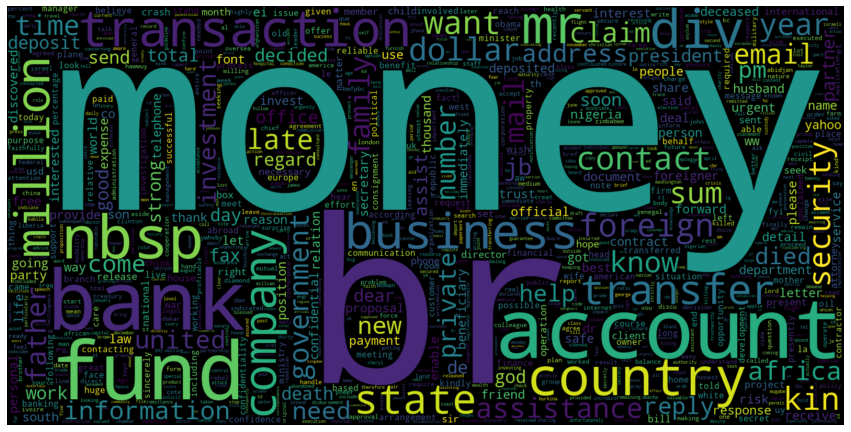

In [53]:
 
words = pre
plt.figure(figsize = (15,15))
word_cloud  = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(words))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [54]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


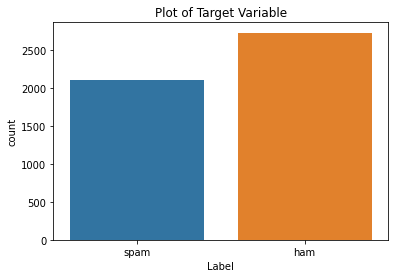

In [55]:
#VISUALIZING OUR TARGET VALUES
sns.countplot(df['Label'])
plt.title("Plot of Target Variable")
plt.show()

In [56]:
df["Label"].value_counts()

ham     2732
spam    2113
Name: Label, dtype: int64

In [57]:
# loading train test split
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test , y_train, y_test = train_test_split(df['Clean_Text'], df['Class'],
                                                    stratify = df['Class'])

In [59]:
# check for startification
y_train.value_counts()

0    2049
1    1584
Name: Class, dtype: int64

In [60]:
y_test.value_counts()

0    683
1    529
Name: Class, dtype: int64

In [61]:
# downloading preprocessing files and model
bert_preprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

In [62]:
import tensorflow as tf

In [63]:
text_input = tf.keras.layers.Input(shape = (), dtype = tf.string, name = 'Inputs')
preprocessed_text = bert_preprocessor(text_input)
embeed = bert_encoder(preprocessed_text)
dropout = tf.keras.layers.Dropout(0.1, name = 'Dropout')(embeed['pooled_output'])
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'Dense')(dropout)

# creating final model
model = tf.keras.Model(inputs = [text_input], outputs = [outputs])

In [64]:
# check summary of model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Inputs (InputLayer)            [(None,)]            0           []                               
                                                                                                  
 keras_layer_4 (KerasLayer)     {'input_mask': (Non  0           ['Inputs[0][0]']                 
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [65]:
Metrics = [tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
           tf.keras.metrics.Precision(name = 'precision'),
           tf.keras.metrics.Recall(name = 'recall')
           ]

model.compile(optimizer ='adam',
               loss = 'binary_crossentropy',
               metrics = Metrics)

In [66]:
#model training phase
history = model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
114/114 [==============================] - 46s 330ms/step - loss: 0.4494 - accuracy: 0.7941 - precision: 0.7794 - recall: 0.7361
Epoch 2/10
114/114 [==============================] - 39s 340ms/step - loss: 0.3495 - accuracy: 0.8640 - precision: 0.8331 - recall: 0.8605
Epoch 3/10
114/114 [==============================] - 40s 350ms/step - loss: 0.3125 - accuracy: 0.8814 - precision: 0.8483 - recall: 0.8864
Epoch 4/10
114/114 [==============================] - 39s 344ms/step - loss: 0.2862 - accuracy: 0.8927 - precision: 0.8618 - recall: 0.8977
Epoch 5/10
114/114 [==============================] - 40s 348ms/step - loss: 0.2682 - accuracy: 0.9017 - precision: 0.8685 - recall: 0.9129
Epoch 6/10
114/114 [==============================] - 39s 346ms/step - loss: 0.2513 - accuracy: 0.9100 - precision: 0.8830 - recall: 0.9148
Epoch 7/10
114/114 [==============================] - 39s 347ms/step - loss: 0.2371 - accuracy: 0.9174 - precision: 0.8929 - recall: 0.9211
Epoch 8/10
114/114 [

In [67]:
# Evaluating performace
model.evaluate(X_test,y_test)

38/38 [==============================] - 14s 342ms/step - loss: 0.1851 - accuracy: 0.9389 - precision: 0.9159 - recall: 0.9471


[0.18506918847560883,
 0.9389439225196838,
 0.9159049391746521,
 0.9470699429512024]

In [68]:
# getting y_pred by predicting over X_text and flattening it
y_pred = model.predict(X_test)
y_pred = y_pred.flatten() # require to be in one dimensional array , for easy maniputation
 

In [69]:
# extract the predicted probabilities
p_pred = model.predict(X_test)
p_pred = p_pred.flatten()

In [70]:
# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

[0 1 1 ... 1 1 0]


In [71]:
# importing consfusion maxtrix
from sklearn.metrics import confusion_matrix , classification_report

In [72]:
# creating confusion matrix 
cm = confusion_matrix(y_test,y_pred)
cm

array([[637,  46],
       [ 28, 501]])

Text(33.0, 0.5, 'Actual')

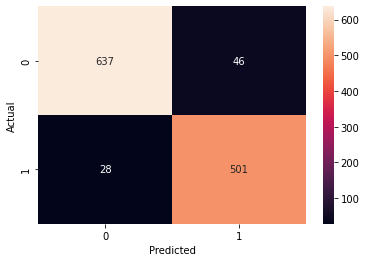

In [73]:
import seaborn as sns
# creating a graph out of confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [74]:
# printing classification report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       683
           1       0.92      0.95      0.93       529

    accuracy                           0.94      1212
   macro avg       0.94      0.94      0.94      1212
weighted avg       0.94      0.94      0.94      1212



In [96]:
predict_text = ["Wow You have won $10,000 provide your bank details to transfer money"]

In [97]:
test_results = model.predict(predict_text)

In [98]:
test_results = model.predict(predict_text)

In [99]:
test_results

array([[0.6316918]], dtype=float32)

In [100]:
output = np.where(test_results>0.5,'spam', 'ham')

In [101]:
output

array([['spam']], dtype='<U4')